In [29]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [4]:
data = pd.read_csv('Churn_Modelling.csv')
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
325,326,15736601,Tai,716,France,Male,35,4,144428.87,1,1,0,134132.65,0
3776,3777,15652218,Morrison,750,France,Male,33,2,152302.72,1,1,0,71333.44,0
7038,7039,15668679,Ozerova,630,France,Male,31,0,0.00,2,1,1,34475.14,0
4752,4753,15620111,Fan,659,France,Male,54,8,133436.52,1,1,0,56787.80,0
5880,5881,15718231,Gregory,537,France,Male,28,0,88963.31,2,1,1,189839.93,0
8404,8405,15709232,McKay,586,Germany,Female,47,5,157099.47,2,1,1,65481.86,0
7167,7168,15732884,Trevisano,676,France,Male,29,7,131959.86,1,0,0,189268.81,0
4830,4831,15620758,Martel,660,Spain,Male,30,4,0.00,2,1,0,129149.06,0
9684,9685,15635775,Watt,781,France,Male,33,3,89276.48,1,1,0,6959.00,0
571,572,15730076,Osborne,651,France,Male,45,1,0.00,1,1,0,67740.08,1


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the categorical and numerical columns
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['Surname', 'Geography', 'Gender']
Numerical columns: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [13]:
data['Geography'].value_counts()


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'],prefix=['Geography', 'Gender'],  drop_first=True)

In [20]:
data.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
6767,608,48,7,75801.74,1,1,0,125762.95,0,False,True,True
3805,668,34,0,0.00,1,0,0,99984.86,0,False,True,True
3128,832,34,6,138190.13,2,0,1,146511.20,0,False,True,False
4009,446,39,1,90217.07,1,1,0,191350.48,0,False,False,False
3132,615,39,4,133707.09,1,1,1,108152.75,0,False,False,True
4666,850,39,5,114491.82,1,1,0,99689.48,0,True,False,False
3293,751,39,3,0.00,2,1,1,84175.34,0,False,False,False
1871,634,36,2,85996.19,1,1,0,15887.68,0,False,True,True
8934,846,37,6,127103.97,1,1,1,41516.44,0,False,False,False
7391,430,31,5,0.00,1,1,0,95655.16,0,False,False,True


In [21]:
# Separate X and y
X = data.drop('Exited', axis=1)
y = data['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling

In [22]:

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


# Logistic Regression

In [23]:

log_reg = LogisticRegression()
log_reg.fit(scaled_X_train, y_train)
y_pred_log_reg = log_reg.predict(scaled_X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# SVM

In [24]:

svm = SVC()
svm.fit(scaled_X_train, y_train)
y_pred_svm = svm.predict(scaled_X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Decision Tree without scaling

In [25]:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Create a summary DataFrame

In [27]:

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree (without scaling)'],
    'Accuracy': [accuracy_log_reg, accuracy_svm, accuracy_dt]
})

# Display the summary
print(models.to_string())


                             Model  Accuracy
0              Logistic Regression    0.8110
1                              SVM    0.8560
2  Decision Tree (without scaling)    0.7785


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



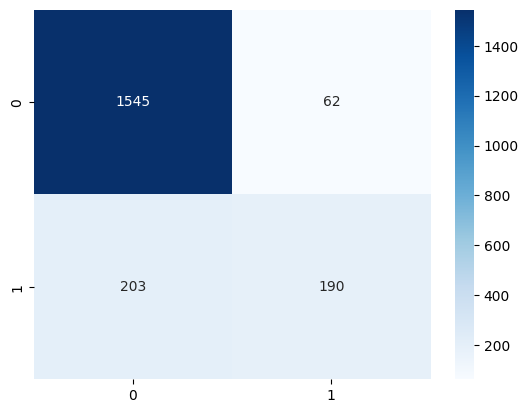

AUC: 0.8526041444000565
                             Model  Accuracy
0              Logistic Regression    0.8110
1                              SVM    0.8560
2  Decision Tree (without scaling)    0.7785
3                    Random Forest    0.8675


In [30]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print('AUC:', auc)

# Add Random Forest to the summary DataFrame
models.loc[len(models)] = ['Random Forest', accuracy_rf]

# Display the updated summary
print(models.to_string())


# Applying cross validation on all 4 models

In [31]:


from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg_scores = cross_val_score(log_reg, X, y, cv=5)
log_reg_accuracy = np.mean(log_reg_scores)

# SVM
svm_scores = cross_val_score(svm, X, y, cv=5)
svm_accuracy = np.mean(svm_scores)

# Decision Tree
dt_scores = cross_val_score(dt, X, y, cv=5)
dt_accuracy = np.mean(dt_scores)

# Random Forest
rf_scores = cross_val_score(rf, X, y, cv=5)
rf_accuracy = np.mean(rf_scores)

# Create a summary DataFrame
models_cv = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_reg_accuracy, svm_accuracy, dt_accuracy, rf_accuracy]
})

# Display the summary
print(models_cv.to_string())


c:\Users\Home\anaconda3\envs\ccp-mlm\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Home\anaconda3\envs\ccp-mlm\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

                 Model  Accuracy
0  Logistic Regression    0.7908
1                  SVM    0.7963
2        Decision Tree    0.7945
3        Random Forest    0.8628


In [33]:

best_model = rf

# Save the best model to a pickle file
import pickle
with open('classifier.pkl', 'wb') as f:
  pickle.dump(best_model, f)

